# Machine learning First Project
## Made By: Momen Bazzar - 1192214


#### description of the project and dataset: https://www.dropbox.com/s/v56my2jh9fntbnx/COMP4388-Fall2023-Project1.pdf?dl=0
#### you need to install the follwing packages using command line: pandas, matplotlib
<hr style="height:5px;">

#### first lets import the needed modules and read the file

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# read the dataset file
df = pd.read_csv('Customer Churn.csv')
df

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,3146,0,no,16,0,1200,19,12,9,2,pre-paid,active,25,108.855,yes
3146,3147,9,no,15,0,5897,134,69,37,1,post-paid,active,15,711.205,yes
3147,3148,5,no,13,0,8437,164,57,35,4,pre-paid,active,45,357.525,yes
3148,3149,1,no,14,2,2357,38,15,14,3,pre-paid,active,30,155.800,yes


<hr style="height:5px;">
<h4>1. print the summary statistics of all attributes in the dataset.

In [3]:
df.describe()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


<hr style="height:5px;">
<h4>2. Show the distribution of the class label (churn) and indicate any highlights in the distribution of the class label.

<AxesSubplot: ylabel='Churn'>

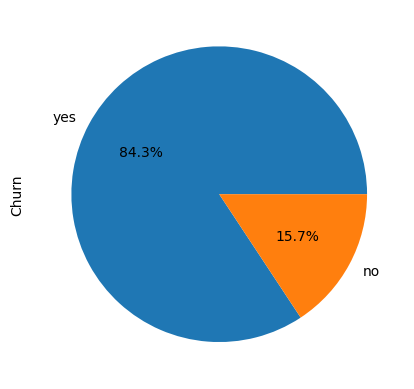

In [4]:
df['Churn'].value_counts().plot(kind="pie", autopct="%1.1f%%")

Text(0, 0.5, 'Count')

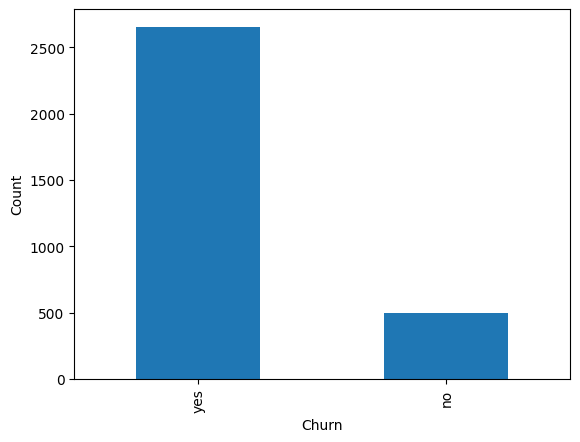

In [14]:
df['Churn'].value_counts().plot(kind="bar")
plt.xlabel("Churn")
plt.ylabel("Count")

<hr>
We realize that our churn rate is 84.3%, which determines that a lot of customers are not satisfied with the company services and stop dealing with the company. That is a huge indicator of a bad policy, and something has to change.

<hr style="height:5px;">
<h4>3. For each age group, draw a histogram detailing the amount of churn in each subgroup.

Text(0, 0.5, 'Percentage')

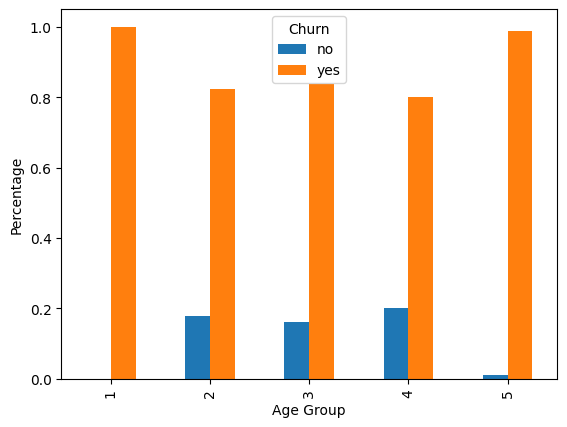

In [16]:
# Group the data by age group and plot a bar chart for each group
(df.groupby('Age Group')['Churn']
   .value_counts()
   .unstack(1)
   .apply(lambda x: x / x.sum(), axis=1)
   .plot(kind="bar"))

plt.xlabel("Age Group")
plt.ylabel("Percentage")

<hr style="height:5px;">
<h4>4. For each Charge amount, draw a histogram detailing the amount of churn in each subgroup.

Text(0, 0.5, 'Percentage')

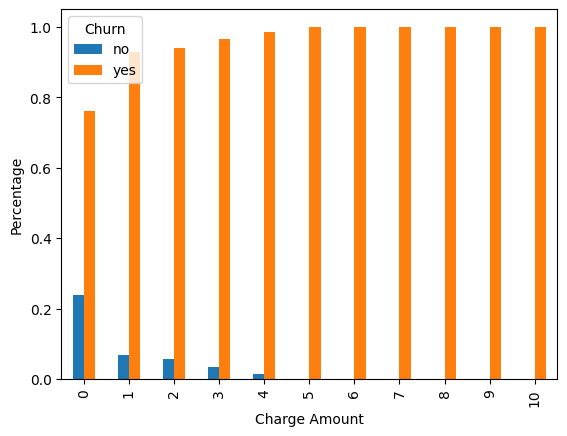

In [7]:
# Group the data by chage amount and plot a bar chart for each group
(df.groupby('Charge Amount')['Churn']
   .value_counts()
   .unstack(1)
   .apply(lambda x: x / x.sum(), axis=1)
   .plot(kind="bar"))

plt.xlabel("Charge Amount")
plt.ylabel("Percentage")

<hr style="height:5px;">
<h4> 5. Show the details of the charge amount of customers.

I'm not sure what kind of details we are looking for, but I will show the amount of customers for each charge amount

Text(0, 0.5, 'Customers Count')

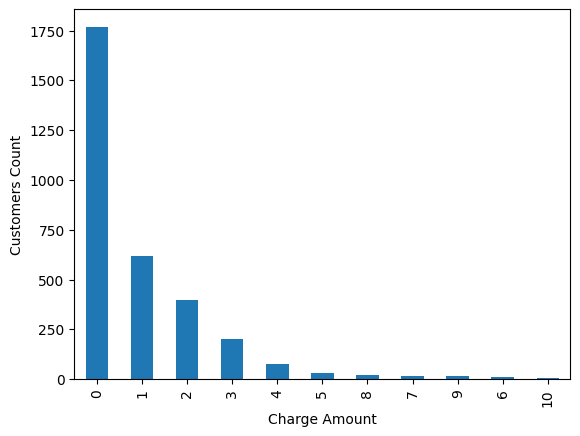

In [9]:
df["Charge Amount"].value_counts().plot(kind="bar")

plt.xlabel("Charge Amount")
plt.ylabel("Customers Count")

<hr style="height:5px;">
<h4> 6. Visualize the correlation between all features and explain them in your own words.

In [11]:
# Convert the non-numeric fields to numeric values to see the correlation
df_dummies = pd.get_dummies(df, columns=["Complains", "Plan","Status","Churn"])
df_dummies.corr()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Complains_no,Complains_yes,Plan_post-paid,Plan_pre-paid,Status_active,Status_not-active,Churn_no,Churn_yes
ID,1.000000,-0.108688,-0.051603,-0.034851,-0.015849,-0.017680,0.006297,-0.003900,-0.027544,-0.021076,0.005464,0.002943,-0.002943,0.006541,-0.006541,-0.012550,0.012550,0.000263,-0.000263
Call Failure,-0.108688,1.000000,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.050406,0.041758,0.121225,-0.152879,0.152879,0.192285,-0.192285,0.114645,-0.114645,-0.008987,0.008987
Subscription Length,-0.051603,0.169737,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,0.021453,-0.002430,0.109565,0.020286,-0.020286,-0.159680,0.159680,-0.142841,0.142841,-0.032588,0.032588
Charge Amount,-0.034851,0.589028,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.279679,0.278955,0.169428,0.033948,-0.033948,0.324232,-0.324232,0.356269,-0.356269,-0.202305,0.202305
Seconds of Use,-0.015849,0.501607,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.020060,0.020843,0.415087,0.104952,-0.104952,0.133593,-0.133593,0.460618,-0.460618,-0.298935,0.298935
Freq. of use,-0.017680,0.573349,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,-0.032544,-0.028350,0.401572,0.090774,-0.090774,0.206452,-0.206452,0.454752,-0.454752,-0.303337,0.303337
Freq. of SMS,0.006297,-0.022282,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,-0.053719,-0.092798,0.924877,0.111633,-0.111633,0.195686,-0.195686,0.296164,-0.296164,-0.220754,0.220754
Distinct Called Numbers,-0.003900,0.504058,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.020941,0.051037,0.284807,0.058199,-0.058199,0.172079,-0.172079,0.413039,-0.413039,-0.278867,0.278867
Age Group,-0.027544,0.050406,0.021453,0.279679,0.020060,-0.032544,-0.053719,0.020941,1.000000,0.960758,-0.183481,-0.019976,0.019976,-0.150593,0.150593,-0.002506,0.002506,-0.014550,0.014550
Age,-0.021076,0.041758,-0.002430,0.278955,0.020843,-0.028350,-0.092798,0.051037,0.960758,1.000000,-0.220362,-0.003298,0.003298,-0.119426,0.119426,0.001312,-0.001312,-0.017705,0.017705


<hr>
We realize that there are some columns with a strong correlation with the ‘Churn’, such as: Status, complains, freq. Of use, freq. Of SMS, distinct called numbers, customer value, etc…, while other values have weak correlation with ‘Churn’ like: call failure, subscription length, age group, etc…, so we might not use these values in our learning process.

We also realize that some values have strong correlation with each other, like: seconds of use & freq of use, customer value & freq of SMS, age & age group. So there is a high chance of using some of these values and not all of them because of the high correlation between them.


### For the Final Data that we will use to train our models, we can do the following:
<ol>
    <li>
        Remove ‘Seconds of Use’ because of it’s very high correlation with ‘Freq. of use’.
    </li>
    <li>
        Remove ‘Freq. of SMS’ because of it’s very high correlation with ‘Customer Value’, and ‘Customer Value’ is more effective and has better correlation with ‘Churn’.
    </li>
    <li>
        Remove ‘Age’ and ‘Age Group’ because it seems like the age is not effective on the churn, and they will weaken the learning process.
    </li>
    <li>
        Remove ‘Distinct Called Numbers’ because of it’s very high correlation with ‘Freq. of use’, and ‘Freq. of use’ is more effective and has better correlation with ‘Churn’.
    </li>
</ol>
